In [243]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt

In [244]:
maxx = 2
minx = -2
maxy = 1.2
miny = -1.2

In [245]:
x = cp.linspace(minx, maxx, 6000)
#xc = np.linspace(minx, maxx, 4000)
ybase = cp.linspace(miny, maxy, 3000)
#ybasec = np.linspace(miny, maxy, 4000)
y = cp.array([cp.complex(0,i) for i in ybase])
#yc = np.array([np.complex(0,i) for i in ybase])

In [246]:
xx, yy = cp.meshgrid(x, y)

In [247]:
z = xx + yy

In [248]:
zero = 0 * z

In [249]:
z0 = z

In [250]:
c = -.7

In [251]:
def mapstep(z):
    return z**3 + cp.sin(z0)

In [252]:
threshold = 3
threshtimes = zero

In [253]:
go = False
if go:
    for i in range(1000):
        # make matrix of time to pass threshold
        # then color accordingly
        passed_thresh = cp.where(z > threshold, i, 0)
        not_already_passed = cp.where(threshtimes > 0, 0, 1)
        just_passed = passed_thresh * not_already_passed
        threshtimes += just_passed
        z = mapstep(z)

In [254]:
go = True
if go:
    for i in range(1000):
        # make matrix of time to pass threshold
        # then color accordingly
        passed_thresh = cp.where(z > threshold, i, 0)
        not_already_passed = cp.where(threshtimes > 0, 0, 1)
        just_passed = passed_thresh * not_already_passed
        threshtimes += just_passed
        last_z = z
        z = mapstep(z)
        change = z - last_z
        small_change = cp.where(cp.abs(change) < .01, i, 0)
        not_already_passed = cp.where(threshtimes > 0, 0, 1)
        just_passed = small_change * not_already_passed
        threshtimes += just_passed

In [255]:
zc = cp.asnumpy(z)

C:\Users\Nick\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


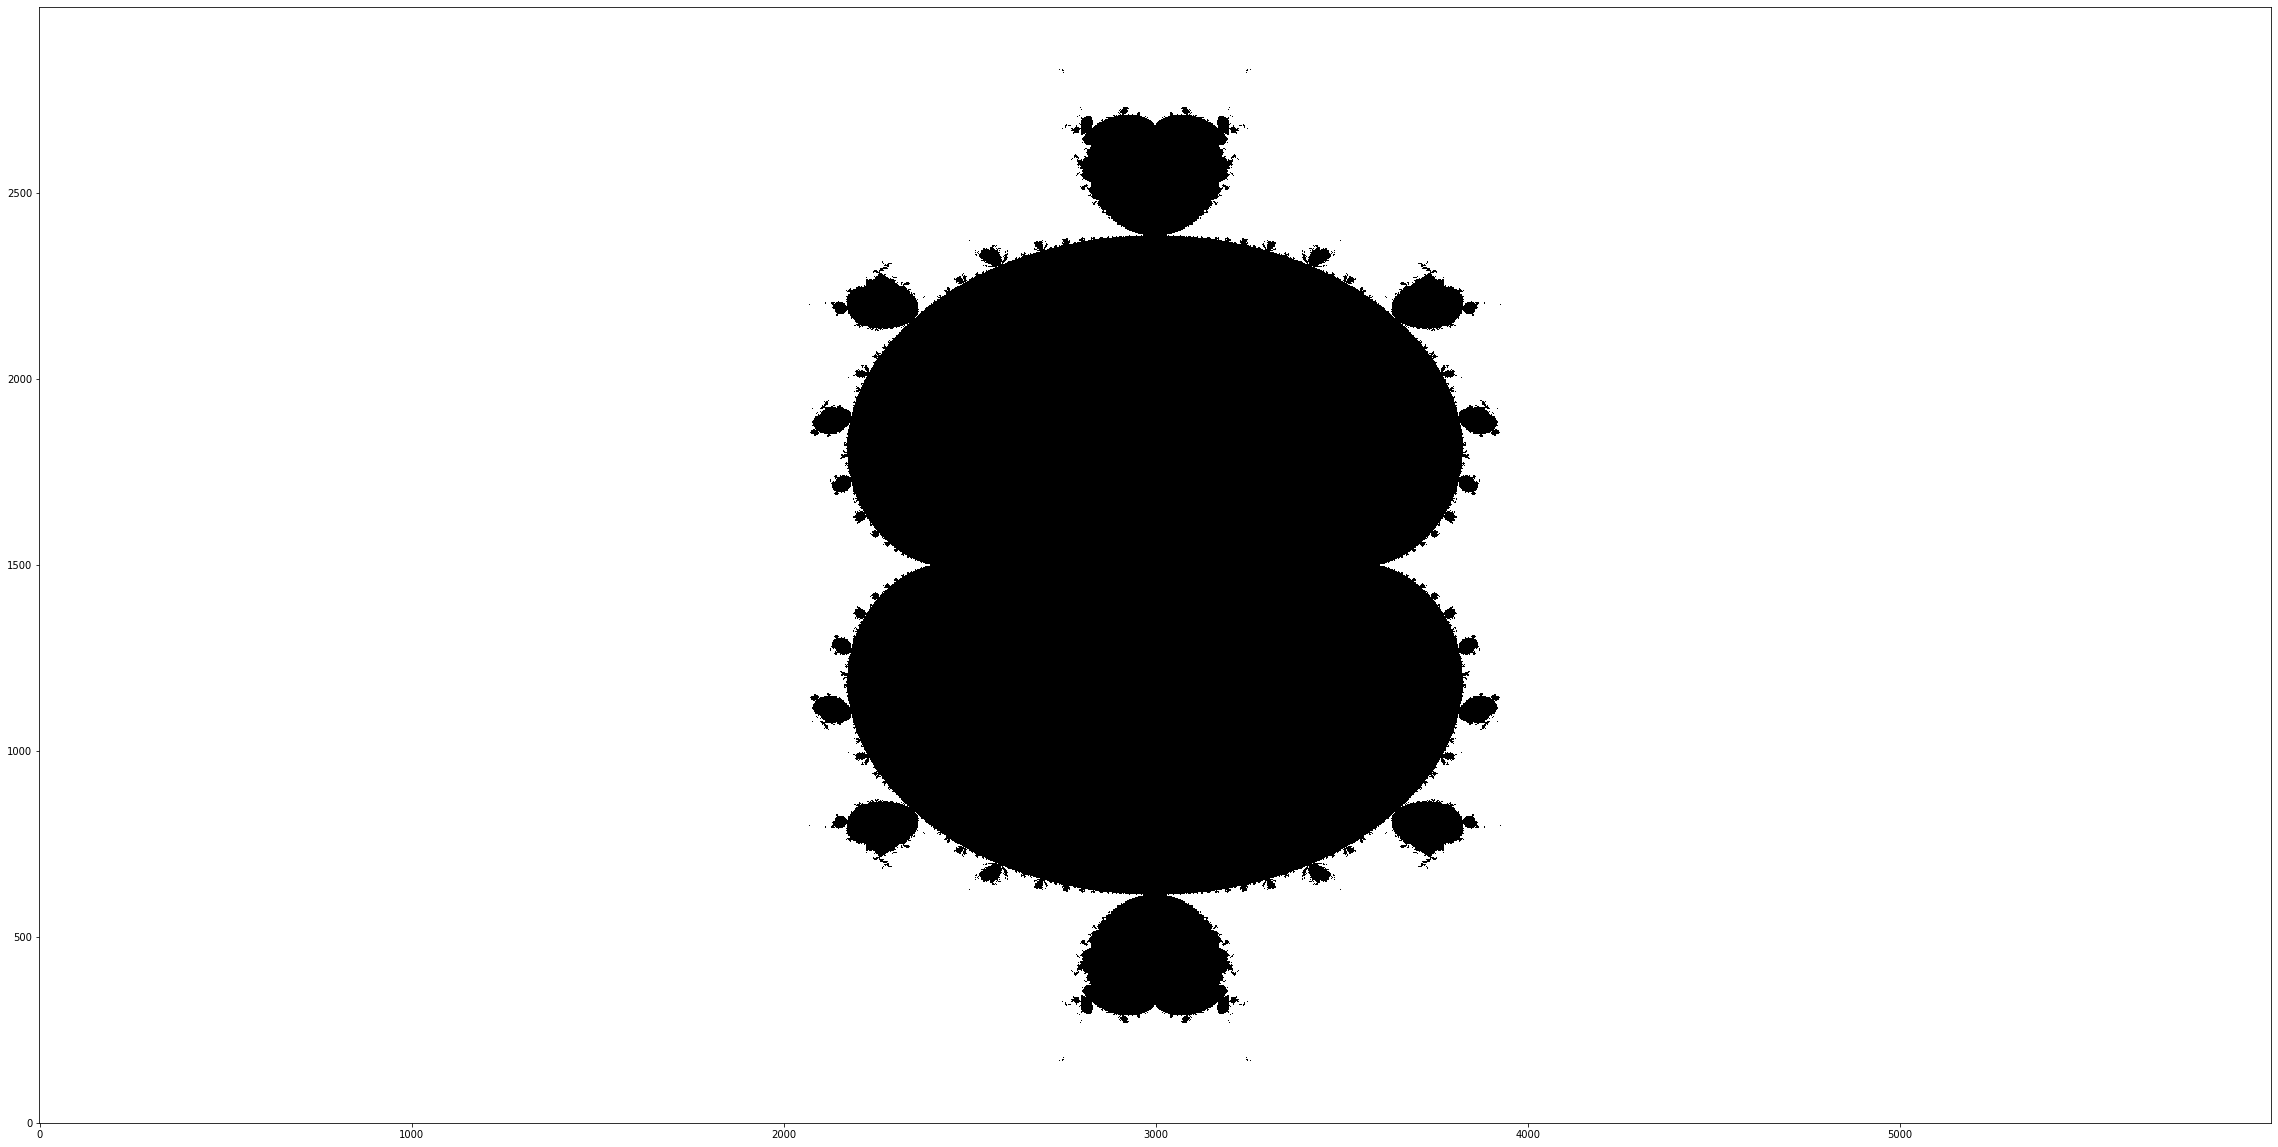

In [256]:
width = maxx - minx
height = maxy - miny
fig = plt.figure(figsize=(width*10, height*10))
plt.imshow(np.abs(zc), cmap='bone', origin='lower')
fig.show()

In [257]:
threshtimes_c = cp.asnumpy(threshtimes)

C:\Users\Nick\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


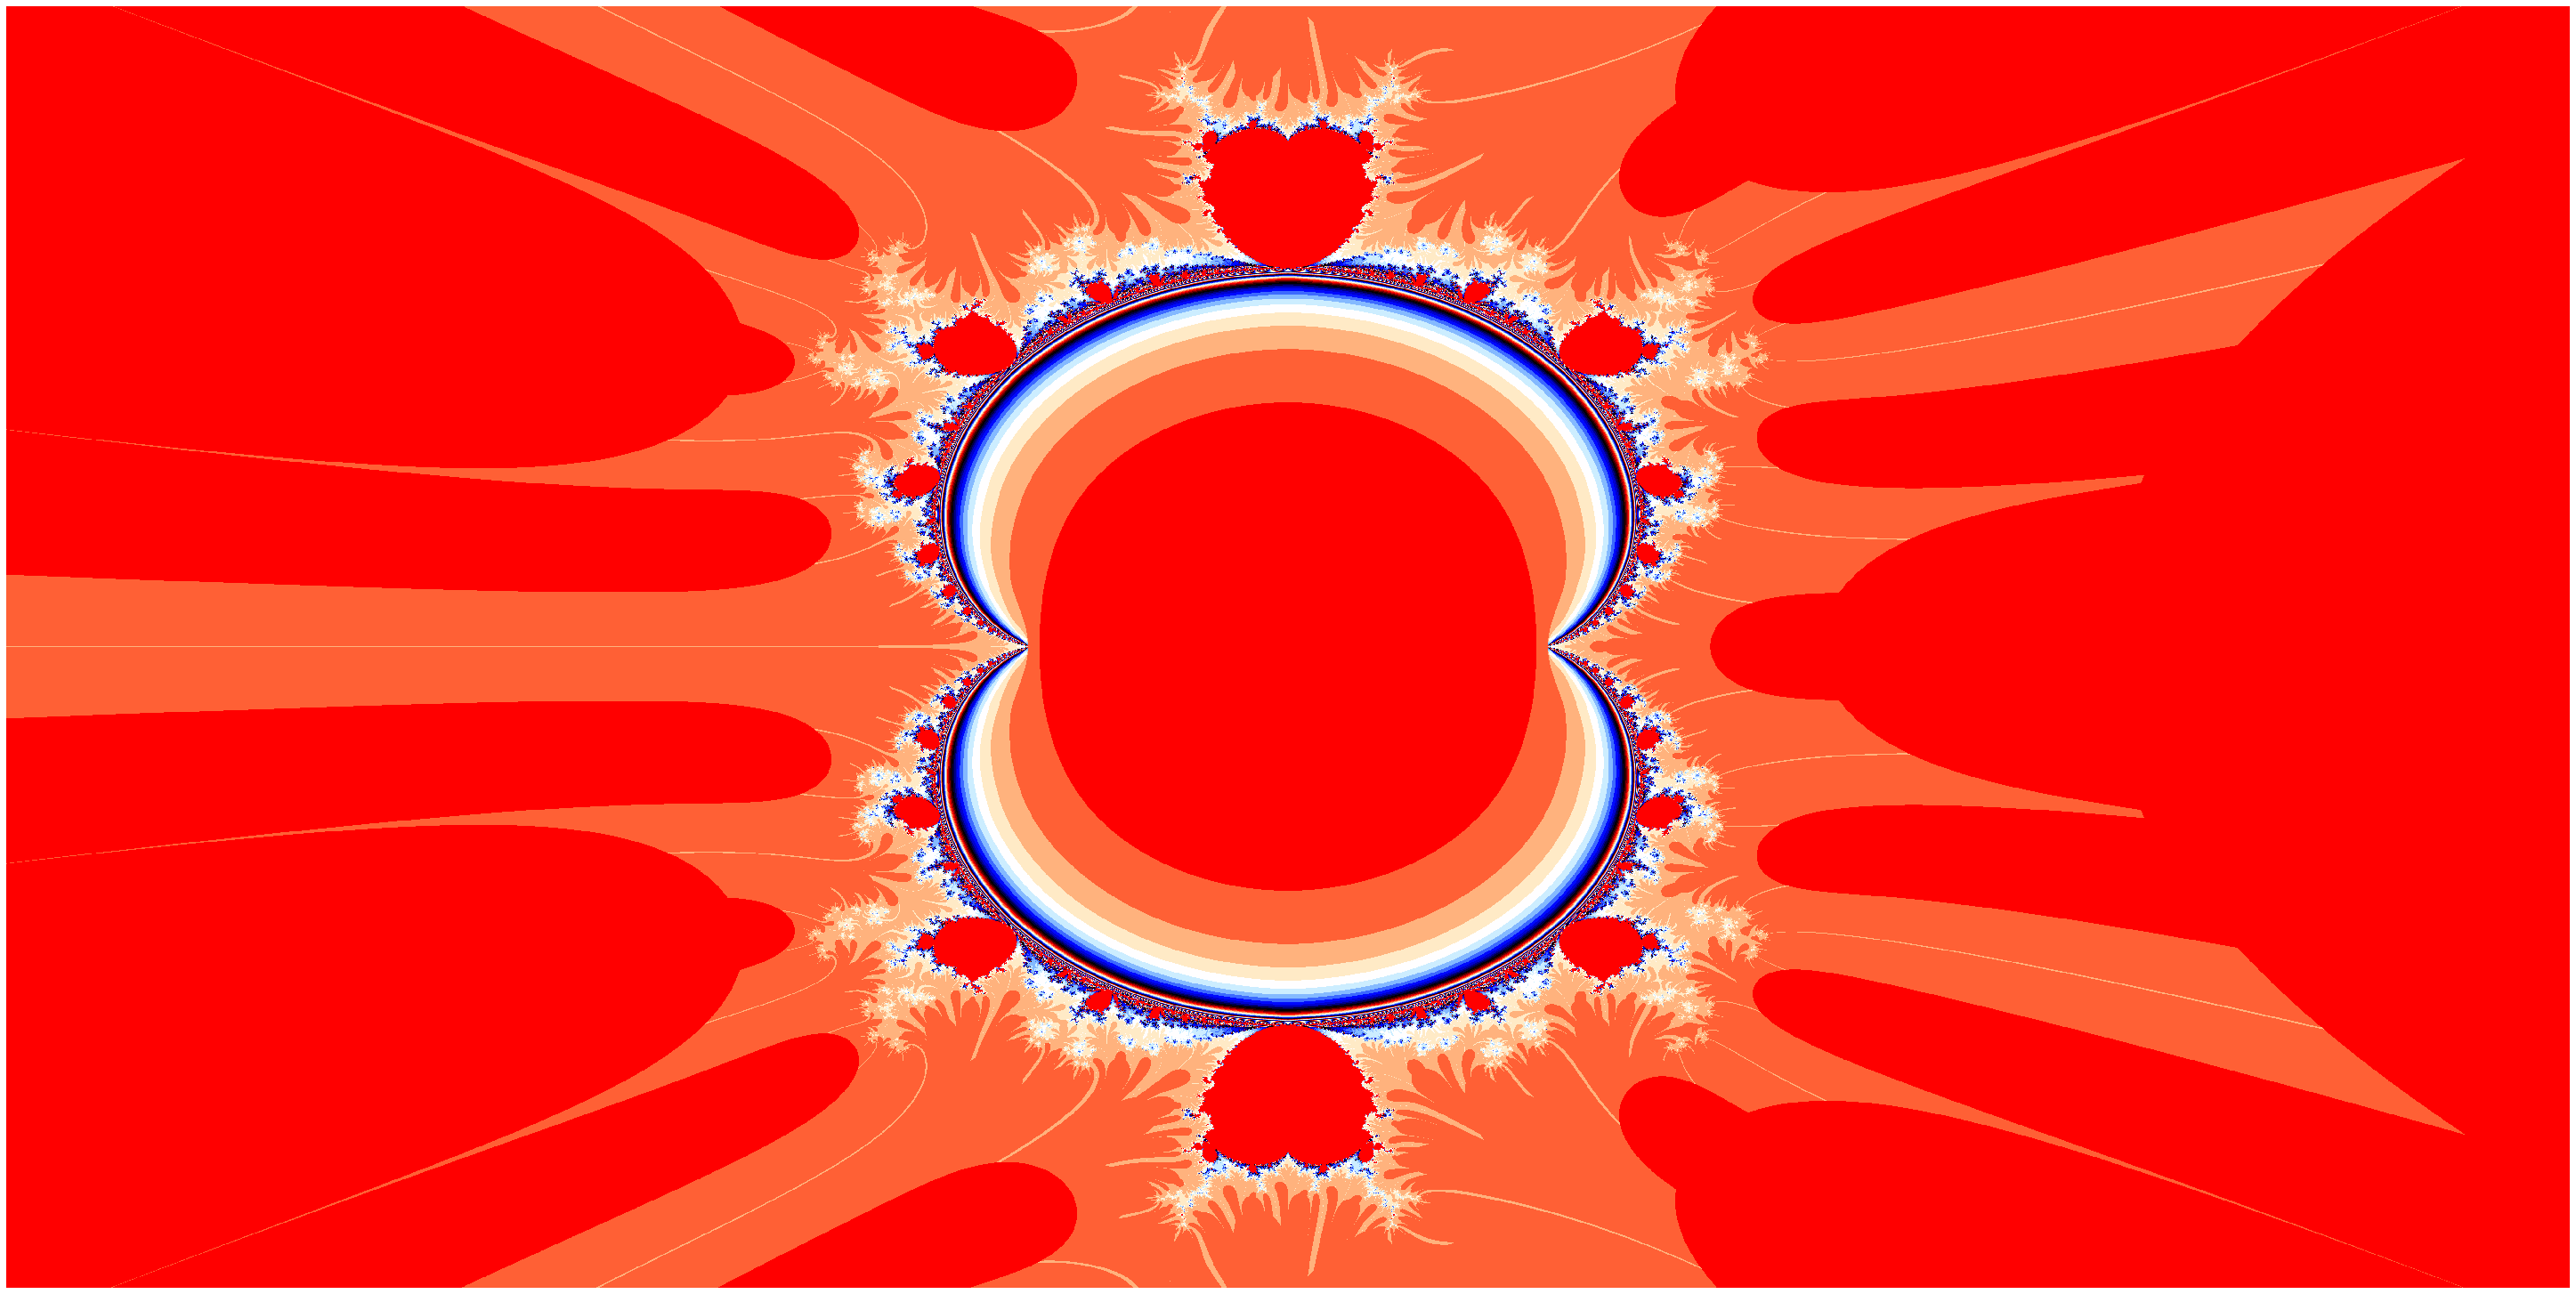

In [258]:
fig = plt.figure(figsize=(width*10, height*10))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(np.abs(threshtimes_c), cmap='flag', origin='lower', aspect='equal')
fig.show()

In [259]:
# as an alternative to plt that uses gpu to power visuals, 
# look into Vispy

In [260]:
# custom colormap

In [261]:
from PIL import Image
arr = np.abs(threshtimes_c)
arr = ( arr - np.mean(arr) ) / np.std(arr)
im = Image.fromarray(np.uint8(plt.cm.plasma(arr)*255))

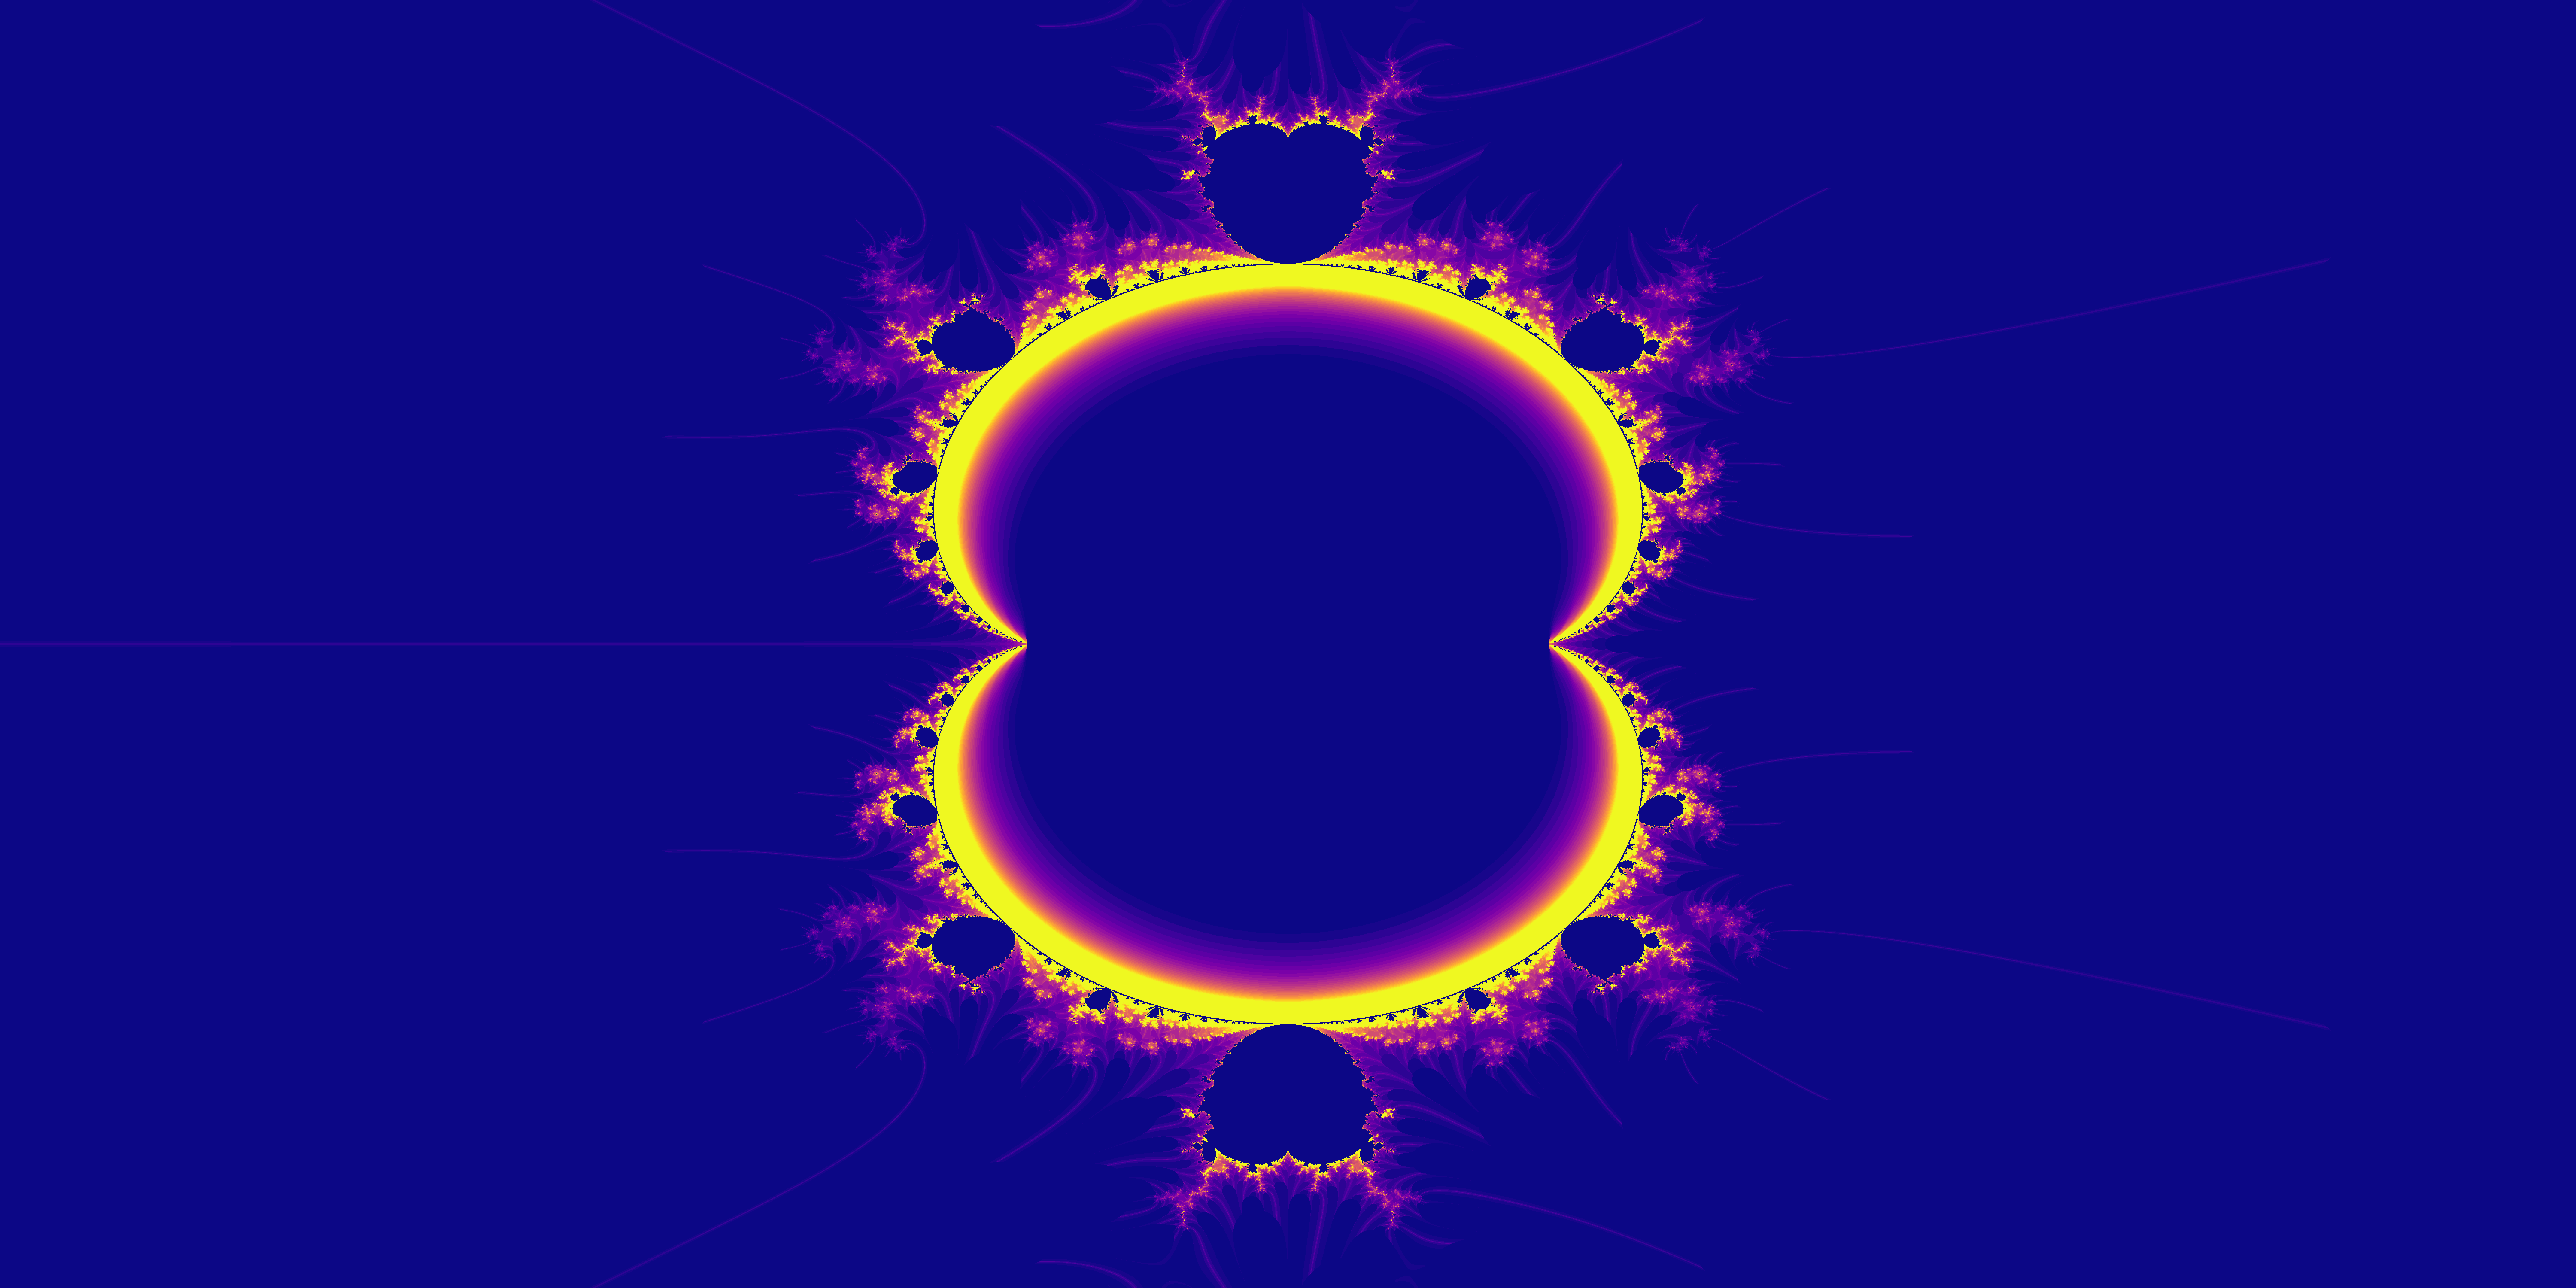

In [262]:
im